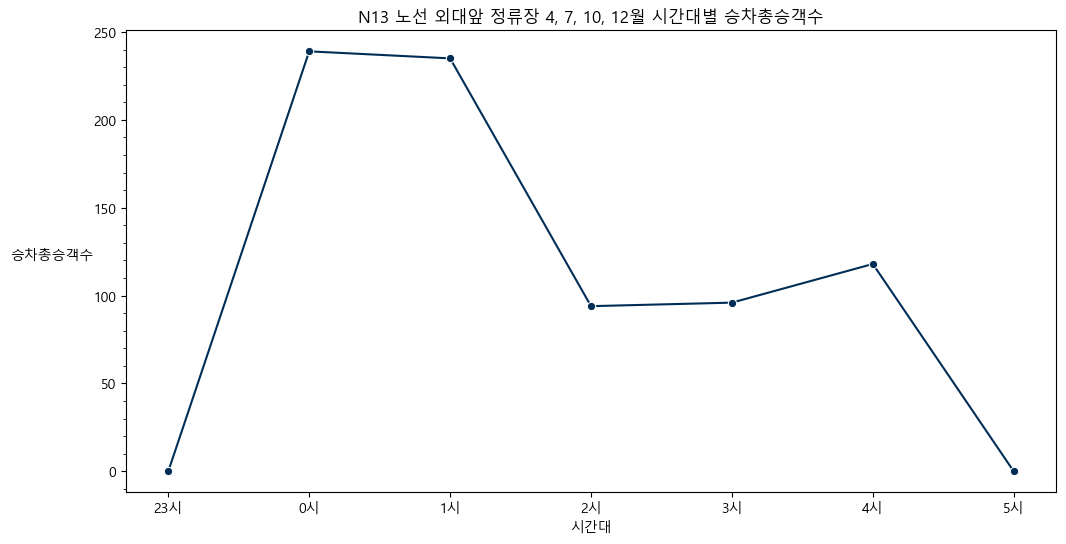

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.ticker import MultipleLocator

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 'Malgun Gothic' 폰트의 경로로 수정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\최지원\Downloads\학교\빅데이터\새 폴더\Dataset\NBusDataset'

# 2022년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2022, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# '사용년월' 컬럼에서 월 부분을 추출하여 새로운 칼럼 만들기
merged_df['Month'] = merged_df['사용년월'].astype(str).str[-2:]

# N13 노선 및 '외대앞' 정류장에 해당하는 데이터만 필터링
n13_waide_df = merged_df[(merged_df['노선번호'] == 'N13') & (merged_df['역명'] == '외대앞')]

# 월이 4, 7, 10, 12인 데이터만 추출
selected_months = ['04', '07', '10', '12']
n13_waide_selected_months_df = n13_waide_df[n13_waide_df['Month'].isin(selected_months)]

# 시간대별 승차총승객수의 합 계산
time_columns_boarding = [f'{hour}시승차총승객수' for hour in range(24)]
time_passengers_boarding = n13_waide_selected_months_df[time_columns_boarding].sum()

# 백만 단위로 변환
time_passengers_boarding_million = time_passengers_boarding

selected_hours = [23, 0, 1, 2, 3, 4, 5]

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=range(len(selected_hours)), y=time_passengers_boarding_million.iloc[selected_hours].values, color='#002D56', marker='o')
plt.xticks(range(len(selected_hours)), [f'{hour}시' for hour in selected_hours])
plt.xlabel('시간대')
plt.ylabel('승차총승객수', rotation=0, labelpad=30)
plt.title('N13 노선 외대앞 정류장 4, 7, 10, 12월 시간대별 승차총승객수')

ax.yaxis.set_minor_locator(MultipleLocator(10))

plt.show()